# PROJECT DATA VISUALIZATION: EXPLORATION

---

## Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import LabelEncoder

---

## Thông tin chung

---

## Khám phá và tiền xử lý dữ liệu

### Đọc dữ liệu

In [2]:
raw_df = pd.read_csv("../dataset/jobs.csv")
raw_df.head()

,Tên công việc,Địa điểm,Tên công ty,Địa chỉ công ty,Người liên hệ,Qui mô công ty,Loại hình hoạt động,Ngày cập nhật,Ngành nghề,Hình thức,Lương,Kinh nghiệm,Cấp bậc,Hết hạn nộp
0,QC STAFF,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kỹ Thuật Bảo Trì,['Bình Dương'],CÔNG TY TNHH LF LOGISTICS (VIỆT NAM),"Lô số 18 L1-2, Đường số 3, Khu công nghiệp Việ...",HR Department,100-499,100% vốn nước ngoài,09/12/2024,"Cơ khí / Ô tô / Tự động hóa , Điện / Điện tử /...",Nhân viên chính thức,Cạnh tranh,1 - 3 Năm,Nhân viên,31/12/2024
2,NHÂN VIÊN BẢO TRÌ,['Bình Dương'],CÔNG TY TNHH SẢN XUẤT GREAT LOTUS VIỆT NAM,"Số 3 VSIP II-A đường số 26, Khu công nghiệp Vi...",CÔNG TY TNHH SẢN XUẤT GREAT LOTUS VIỆT NAM,100-499,100% vốn nước ngoài,09/12/2024,Bảo trì / Sửa chữa,Nhân viên chính thức,13 Tr - 15 Tr VND,3 - 4 Năm,Nhân viên,09/12/2024
3,HR cum Compliance Manager,['Bình Dương'],CTY TNHH S.H VIET NAM,"241 Khu phố Hưng Lộc Phường Hưng Đinh, Tp Thuậ...",Phòng Nhân Sự,500-999,100% vốn nước ngoài,09/12/2024,"Quản lý điều hành , Nhân sự , Dệt may / Da già...",Nhân viên chính thức,Cạnh tranh,Lên đến 5 Năm,Quản lý,31/12/2024
4,CHUYÊN VIÊN TƯ VẤN ĐẦU TƯ CHỨNG KHOÁN KHÁCH HÀ...,['Bình Dương'],VDSC - CÔNG TY CP CHỨNG KHOÁN RỒNG VIỆT,"Lầu 4, Tòa nhà Viet Dragon, 141 Nguyễn Du, P. ...",Công ty Cổ phần Chứng khoán Rồng Việt,500-999,Cổ phần,09/12/2024,"Ngân hàng , Chứng khoán , Tài chính / Đầu tư",Nhân viên chính thức,7 Tr - 20 Tr VND,NaN,Nhân viên,31/01/2025


### Số hàng và số cột của tập dữ liệu

In [3]:
nrows, ncols = raw_df.shape
print('Số hàng của dataset:', nrows)
print('Số cột của dataset:', ncols)

Số hàng của dataset: 20305
Số cột của dataset: 14


### Ý nghĩa của mỗi hàng

Mỗi dòng dữ liệu là một công việc đang cần tìm ứng viên với các mô tả là `Tên công việc`, `Địa điểm`, `Tên công ty`, `Địa chỉ công ty`, `Người liên hệ`, `Qui mô công ty`, `Loại hình hoạt động`, `Ngày cập nhật`, `Ngành nghề`, `Hình thức`, `Lương`, `Kinh nghiệm`, `Cấp bậc`, `Hết hạn nộp`.


### Loại bỏ những hàng trùng lặp

In [4]:
num_duplicates = raw_df.duplicated().sum()
print(f"Số hàng trùng lặp: {num_duplicates}")

Số hàng trùng lặp: 703


In [5]:
raw_df = raw_df.drop_duplicates()

In [6]:
nrows, ncols = raw_df.shape
print('Số hàng của dataset sau khi xử lý:', nrows)

Số hàng của dataset sau khi xử lý: 19602


### Loại bỏ những dòng không chứa dữ liệu

Những dòng có '[]' ở cột `Địa điểm` thì xóa bỏ.

In [7]:
raw_df = raw_df[(raw_df['Địa điểm'] != '[]') & (raw_df['Địa điểm'] != ' ')]
raw_df = raw_df[raw_df['Tên công việc'] != ' ']

In [8]:
raw_df.shape

(19154, 14)

In [9]:
raw_df.isnull().sum()

Tên công việc             0
Địa điểm                  0
Tên công ty             961
Địa chỉ công ty         963
Người liên hệ           961
Qui mô công ty         4000
Loại hình hoạt động    1596
Ngày cập nhật             0
Ngành nghề                0
Hình thức                 1
Lương                     0
Kinh nghiệm            3888
Cấp bậc                   0
Hết hạn nộp               0
dtype: int64

In [10]:
# Bỏ những dòng chứa các ô dữ liệu rỗng
raw_df = raw_df.dropna(how='any', axis=0)

In [11]:
raw_df.isnull().sum()

Tên công việc          0
Địa điểm               0
Tên công ty            0
Địa chỉ công ty        0
Người liên hệ          0
Qui mô công ty         0
Loại hình hoạt động    0
Ngày cập nhật          0
Ngành nghề             0
Hình thức              0
Lương                  0
Kinh nghiệm            0
Cấp bậc                0
Hết hạn nộp            0
dtype: int64

In [12]:
raw_df.shape

(11778, 14)

### Ý nghĩa của mỗi cột

In [13]:
# Xem tên của từng cột
raw_df.columns

Index(['Tên công việc', 'Địa điểm', 'Tên công ty', 'Địa chỉ công ty',
       'Người liên hệ', 'Qui mô công ty', 'Loại hình hoạt động',
       'Ngày cập nhật', 'Ngành nghề', 'Hình thức', 'Lương', 'Kinh nghiệm',
       'Cấp bậc', 'Hết hạn nộp'],
      dtype='object')

**Ý nghĩa của mỗi cột**:
- `Tên công việc`: Tên công việc cần tuyển dụng.
- `Địa điểm`: Địa điểm làm việc.
- `Tên công ty`: Tên công ty tuyển dụng.
- `Địa chỉ công ty`: Địa điểm của công ty tuyển dụng.
- `Người liên hệ`: Thông tin người có thể liên hệ hỏi đáp.
- `Qui mô công ty`: Qui mô công ty tuyển dụng.
- `Loại hình hoạt động`: Loại hình hoạt động của công ty tuyển dụng.
- `Ngày cập nhật`: Lần cập nhật gần nhất của thông tin tuyển dụng.
- `Ngành nghề`: Lĩnh vực của công việc.
- `Hình thức`: Hình thức của công việc ứng tuyển.
- `Lương`: Lương sau khi được nhận vào làm.
- `Kinh nghiệm`: Yêu cầu năm kinh nghiệm để ứng tuyển.
- `Cấp bậc`: Cấp bậc, vị trí việc làm của nhân viên.
- `Hết hạn nộp`: Hạn chót ứng tuyển công việc này.

### Kiểu dữ liệu hiện tại của mỗi cột là gì? Có cột nào có kiểu dữ liệu không phù hợp không?

In [14]:
# In thông tin của các cột
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11778 entries, 1 to 20304
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Tên công việc        11778 non-null  object
 1   Địa điểm             11778 non-null  object
 2   Tên công ty          11778 non-null  object
 3   Địa chỉ công ty      11778 non-null  object
 4   Người liên hệ        11778 non-null  object
 5   Qui mô công ty       11778 non-null  object
 6   Loại hình hoạt động  11778 non-null  object
 7   Ngày cập nhật        11778 non-null  object
 8   Ngành nghề           11778 non-null  object
 9   Hình thức            11778 non-null  object
 10  Lương                11778 non-null  object
 11  Kinh nghiệm          11778 non-null  object
 12  Cấp bậc              11778 non-null  object
 13  Hết hạn nộp          11778 non-null  object
dtypes: object(14)
memory usage: 1.3+ MB


Để phân tích về thị trường việc làm ở Việt Nam hiện tại với các thuộc tính trên, ta có thể chia thành 2 loại kiểu dữ liệu:
- Kiểu số: `Qui mô công ty`, `Lương`, `Kinh nghiệm`, `Ngày cập nhật`, `Hết hạn nộp`.
- Kiểu phân loại: `Tên công việc`, `Địa điểm`, `Tên công ty`, `Địa chỉ công ty`, `Người liên hệ`, `Loại hình hoạt động`, `Ngành nghề`, `Hình thức`, `Cấp bậc`.

Để thuận tiện cho việc chuyển kiểu dữ liệu, ta sẽ xem xét từng cột để xử lý kiểu dữ liệu cho phù hợp.

**`Tên công việc`**

Xử lý chuỗi

In [15]:
raw_df.shape

(11778, 14)

In [16]:
len(raw_df['Tên công việc'].unique())

9629

In [17]:
# Xóa các cụm từ trong ngoặc vuông và ngoặc tròn vì nó chứa thông tin bổ sung hoặc địa điểm
raw_df['Tên công việc'] = raw_df['Tên công việc'].str.replace(r'\[.*?\]', '', regex=True).str.strip()
raw_df['Tên công việc'] = raw_df['Tên công việc'].str.replace(r'\(.*?\)', '', regex=True).str.strip()

In [18]:
# Xóa những tiêu đề đánh dấu không cần thiết
raw_df['Tên công việc'] = raw_df['Tên công việc'].str.replace('HCM', '').str.strip()
raw_df['Tên công việc'] = raw_df['Tên công việc'].str.replace('HO', '').str.strip()
raw_df['Tên công việc'] = raw_df['Tên công việc'].str.replace('Tuyển Gấp', '').str.strip()
raw_df['Tên công việc'] = raw_df['Tên công việc'].str.replace('SBG', '').str.strip()
raw_df['Tên công việc'] = raw_df['Tên công việc'].str.replace('CƠM NGON SIBA', '').str.strip()

In [19]:
# Loại bỏ dấu - dư ra sau khi xóa những cái trên
raw_df['Tên công việc'] = raw_df['Tên công việc'].str.lstrip('-').str.strip()

# Bỏ những cụm từ sau dấu -
raw_df['Tên công việc'] = raw_df['Tên công việc'].str.replace(r'-.*', '', regex=True).str.strip()

In [20]:
# Chuẩn hóa tên công việc: viết hoa mỗi từ
raw_df['Tên công việc'] = raw_df['Tên công việc'].str.title()

In [21]:
# Xóa những thông tin dư thừa
raw_df['Tên công việc'] = raw_df['Tên công việc'].str.split(' Tại').str[0].str.strip()
raw_df['Tên công việc'] = raw_df['Tên công việc'].str.split(' Khu Vực').str[0].str.strip()
raw_df['Tên công việc'] = raw_df['Tên công việc'].str.split(' Thu Nhập').str[0].str.strip()
raw_df['Tên công việc'] = raw_df['Tên công việc'].str.split(' Làm Việc').str[0].str.strip()
raw_df['Tên công việc'] = raw_df['Tên công việc'].str.split(' In').str[0].str.strip()

In [22]:
len(raw_df['Tên công việc'].unique())

6416

**`Địa điểm`**

Chuẩn hóa format

In [23]:
# Chuyển tất cả giá trị trong cột 'Địa điểm' về kiểu chuỗi không có dấu '[', ']' và dấu nháy đơn
raw_df['Địa điểm'] = raw_df['Địa điểm'].apply(lambda x: str(x).replace('[', '').replace(']', ''))
raw_df['Địa điểm'] = raw_df['Địa điểm'].apply(lambda x: str(x).replace("'", ""))

In [24]:
raw_df.head()

,Tên công việc,Địa điểm,Tên công ty,Địa chỉ công ty,Người liên hệ,Qui mô công ty,Loại hình hoạt động,Ngày cập nhật,Ngành nghề,Hình thức,Lương,Kinh nghiệm,Cấp bậc,Hết hạn nộp
1,Kỹ Thuật Bảo Trì,Bình Dương,CÔNG TY TNHH LF LOGISTICS (VIỆT NAM),"Lô số 18 L1-2, Đường số 3, Khu công nghiệp Việ...",HR Department,100-499,100% vốn nước ngoài,09/12/2024,"Cơ khí / Ô tô / Tự động hóa , Điện / Điện tử /...",Nhân viên chính thức,Cạnh tranh,1 - 3 Năm,Nhân viên,31/12/2024
2,Nhân Viên Bảo Trì,Bình Dương,CÔNG TY TNHH SẢN XUẤT GREAT LOTUS VIỆT NAM,"Số 3 VSIP II-A đường số 26, Khu công nghiệp Vi...",CÔNG TY TNHH SẢN XUẤT GREAT LOTUS VIỆT NAM,100-499,100% vốn nước ngoài,09/12/2024,Bảo trì / Sửa chữa,Nhân viên chính thức,13 Tr - 15 Tr VND,3 - 4 Năm,Nhân viên,09/12/2024
3,Hr Cum Compliance Manager,Bình Dương,CTY TNHH S.H VIET NAM,"241 Khu phố Hưng Lộc Phường Hưng Đinh, Tp Thuậ...",Phòng Nhân Sự,500-999,100% vốn nước ngoài,09/12/2024,"Quản lý điều hành , Nhân sự , Dệt may / Da già...",Nhân viên chính thức,Cạnh tranh,Lên đến 5 Năm,Quản lý,31/12/2024
5,Giám Sát Kho,Bình Dương,CÔNG TY AVANTI - GROUP,"Tầng 18, Tòa nhà Bitexco,Phường Bến Nghé, Quận...",Ms. Hoa,100-499,Trách nhiệm hữu hạn,09/12/2024,Vận chuyển / Giao nhận / Kho vận,Nhân viên chính thức,15 Tr - 18 Tr VND,3 - 5 Năm,Trưởng nhóm / Giám sát,09/01/2025
7,Nhân Viên Sáng Tạo Nội Dung,Bình Dương,"CÔNG TY CỔ PHẦN SẢN XUẤT, THƯƠNG MẠI VÀ DỊCH V...",P26.01 - Tòa nhà TTTM và Căn hộ Xa la - Phường...,P. HCNS,100-499,Cổ phần,09/12/2024,"Tiếp thị / Marketing , Bán hàng / Kinh doanh ,...",Nhân viên chính thức,8 Tr - 15 Tr VND,1 - 2 Năm,Nhân viên,31/12/2024


**`Tên công ty`**

Ổn

**`Địa điểm công ty`**

Ổn

**`Người liên hệ`**

Ổn

**`Qui mô công ty`**

- 100 - 499, ít hơn 10 -> phân loại siêu nhỏ, nhỏ, vừa, lớn, siêu lớn
- Ngày tháng năm -> bỏ

In [25]:
# Tách giá trị lớn nhất từ cột "Qui mô công ty"
raw_df['Max qui mô'] = raw_df['Qui mô công ty'].str.extract(r'(\d+)(?:\+|-?\d+)?$').astype(float)

# Phân loại theo mức độ
def classify_size(value):
    if value < 10:
        return 'Siêu nhỏ'
    elif value < 100:
        return 'Nhỏ'
    elif value < 200:
        return 'Vừa'
    elif value < 1000:
        return 'Lớn'
    else:
        return 'Siêu lớn'

# Áp dụng phân loại
raw_df['Quy mô công ty'] = raw_df['Max qui mô'].apply(classify_size)

# Xóa cột 'Max Qui mô' khỏi DataFrame
raw_df = raw_df.drop(columns=['Max qui mô'])

In [26]:
raw_df.shape

(11778, 15)

In [27]:
# Tính số lượng từng giá trị
count_values = raw_df['Quy mô công ty'].value_counts()
count_values

Lớn         5090
Vừa         3764
Nhỏ         2536
Siêu lớn     340
Siêu nhỏ      48
Name: Quy mô công ty, dtype: int64

In [28]:
raw_df.head()

,Tên công việc,Địa điểm,Tên công ty,Địa chỉ công ty,Người liên hệ,Qui mô công ty,Loại hình hoạt động,Ngày cập nhật,Ngành nghề,Hình thức,Lương,Kinh nghiệm,Cấp bậc,Hết hạn nộp,Quy mô công ty
1,Kỹ Thuật Bảo Trì,Bình Dương,CÔNG TY TNHH LF LOGISTICS (VIỆT NAM),"Lô số 18 L1-2, Đường số 3, Khu công nghiệp Việ...",HR Department,100-499,100% vốn nước ngoài,09/12/2024,"Cơ khí / Ô tô / Tự động hóa , Điện / Điện tử /...",Nhân viên chính thức,Cạnh tranh,1 - 3 Năm,Nhân viên,31/12/2024,Vừa
2,Nhân Viên Bảo Trì,Bình Dương,CÔNG TY TNHH SẢN XUẤT GREAT LOTUS VIỆT NAM,"Số 3 VSIP II-A đường số 26, Khu công nghiệp Vi...",CÔNG TY TNHH SẢN XUẤT GREAT LOTUS VIỆT NAM,100-499,100% vốn nước ngoài,09/12/2024,Bảo trì / Sửa chữa,Nhân viên chính thức,13 Tr - 15 Tr VND,3 - 4 Năm,Nhân viên,09/12/2024,Vừa
3,Hr Cum Compliance Manager,Bình Dương,CTY TNHH S.H VIET NAM,"241 Khu phố Hưng Lộc Phường Hưng Đinh, Tp Thuậ...",Phòng Nhân Sự,500-999,100% vốn nước ngoài,09/12/2024,"Quản lý điều hành , Nhân sự , Dệt may / Da già...",Nhân viên chính thức,Cạnh tranh,Lên đến 5 Năm,Quản lý,31/12/2024,Lớn
5,Giám Sát Kho,Bình Dương,CÔNG TY AVANTI - GROUP,"Tầng 18, Tòa nhà Bitexco,Phường Bến Nghé, Quận...",Ms. Hoa,100-499,Trách nhiệm hữu hạn,09/12/2024,Vận chuyển / Giao nhận / Kho vận,Nhân viên chính thức,15 Tr - 18 Tr VND,3 - 5 Năm,Trưởng nhóm / Giám sát,09/01/2025,Vừa
7,Nhân Viên Sáng Tạo Nội Dung,Bình Dương,"CÔNG TY CỔ PHẦN SẢN XUẤT, THƯƠNG MẠI VÀ DỊCH V...",P26.01 - Tòa nhà TTTM và Căn hộ Xa la - Phường...,P. HCNS,100-499,Cổ phần,09/12/2024,"Tiếp thị / Marketing , Bán hàng / Kinh doanh ,...",Nhân viên chính thức,8 Tr - 15 Tr VND,1 - 2 Năm,Nhân viên,31/12/2024,Vừa


**`Loại hình hoạt động`**

Ổn

**`Ngày cập nhật`**

Chuyển kiểu datetime

In [29]:
raw_df['Ngày cập nhật'] = pd.to_datetime(raw_df['Ngày cập nhật'],  format='%d/%m/%Y', errors='coerce')

**`Ngành nghề`**

Chuẩn hóa format

In [30]:
# Thay dấu '/' bằng dấu ',' trong cột 'Ngành nghề'
raw_df['Ngành nghề'] = raw_df['Ngành nghề'].apply(lambda x: ', '.join(word.strip() for word in str(x).replace('/', ',').split(',')))
raw_df.head()

,Tên công việc,Địa điểm,Tên công ty,Địa chỉ công ty,Người liên hệ,Qui mô công ty,Loại hình hoạt động,Ngày cập nhật,Ngành nghề,Hình thức,Lương,Kinh nghiệm,Cấp bậc,Hết hạn nộp,Quy mô công ty
1,Kỹ Thuật Bảo Trì,Bình Dương,CÔNG TY TNHH LF LOGISTICS (VIỆT NAM),"Lô số 18 L1-2, Đường số 3, Khu công nghiệp Việ...",HR Department,100-499,100% vốn nước ngoài,2024-12-09,"Cơ khí, Ô tô, Tự động hóa, Điện, Điện tử, Điện...",Nhân viên chính thức,Cạnh tranh,1 - 3 Năm,Nhân viên,31/12/2024,Vừa
2,Nhân Viên Bảo Trì,Bình Dương,CÔNG TY TNHH SẢN XUẤT GREAT LOTUS VIỆT NAM,"Số 3 VSIP II-A đường số 26, Khu công nghiệp Vi...",CÔNG TY TNHH SẢN XUẤT GREAT LOTUS VIỆT NAM,100-499,100% vốn nước ngoài,2024-12-09,"Bảo trì, Sửa chữa",Nhân viên chính thức,13 Tr - 15 Tr VND,3 - 4 Năm,Nhân viên,09/12/2024,Vừa
3,Hr Cum Compliance Manager,Bình Dương,CTY TNHH S.H VIET NAM,"241 Khu phố Hưng Lộc Phường Hưng Đinh, Tp Thuậ...",Phòng Nhân Sự,500-999,100% vốn nước ngoài,2024-12-09,"Quản lý điều hành, Nhân sự, Dệt may, Da giày, ...",Nhân viên chính thức,Cạnh tranh,Lên đến 5 Năm,Quản lý,31/12/2024,Lớn
5,Giám Sát Kho,Bình Dương,CÔNG TY AVANTI - GROUP,"Tầng 18, Tòa nhà Bitexco,Phường Bến Nghé, Quận...",Ms. Hoa,100-499,Trách nhiệm hữu hạn,2024-12-09,"Vận chuyển, Giao nhận, Kho vận",Nhân viên chính thức,15 Tr - 18 Tr VND,3 - 5 Năm,Trưởng nhóm / Giám sát,09/01/2025,Vừa
7,Nhân Viên Sáng Tạo Nội Dung,Bình Dương,"CÔNG TY CỔ PHẦN SẢN XUẤT, THƯƠNG MẠI VÀ DỊCH V...",P26.01 - Tòa nhà TTTM và Căn hộ Xa la - Phường...,P. HCNS,100-499,Cổ phần,2024-12-09,"Tiếp thị, Marketing, Bán hàng, Kinh doanh, Tiế...",Nhân viên chính thức,8 Tr - 15 Tr VND,1 - 2 Năm,Nhân viên,31/12/2024,Vừa


**`Hình thức`**

Ổn

**`Lương`**

- Cạnh tranh ->  mã hóa -1
- 15 tr - 20 tr -> thành 2 cột `Lương tối thiểu` và `Lương tối đa`
- Chuyển sang VND

In [31]:
def process_salary(salary):
    salary = str(salary).lower().strip()  # Chuyển về chữ thường và loại bỏ khoảng trắng

    # Tách giá trị trước và sau dấu '-'
    parts = re.split(r' - ', salary)
    
    if len(parts) == 2:
        min_val, max_val = parts
        
        if 'vnd' in max_val.lower():
            if 'tr' not in min_val.lower() and 'tr' in max_val.lower():
                max_val_parts = re.findall(r'[\d,.]+', max_val)
                min_val_parts = re.findall(r'[\d,.]+', min_val)
                
                if max_val_parts and min_val_parts:
                    min_value = float(min_val_parts[0].replace(',', ''))
                    max_value = float(max_val_parts[0].replace(',', '.'))
                    
                    min_value /= 1e6
                    min_value = round(min_value, 1)
                    
                    return f"{min_value} Tr - {max_value} Tr VND"
    return salary

raw_df['Lương xử lý'] = raw_df['Lương'].apply(process_salary)

In [32]:
# Tỷ giá USD sang VND (có thể thay đổi nếu cần)
usd_to_vnd_rate = 24000

# Hàm chuẩn hóa và tách lương
# Hàm chuẩn hóa và tách lương
def split_salary_vnd_usd(salary):
    # Chuẩn hóa dữ liệu
    salary = salary.lower().strip()
    
    # Loại bỏ ký tự không liên quan và thay dấu phẩy thành dấu chấm
    salary_cleaned = re.sub(r'[^\d\-, ]', '', salary).replace(',', '.')
    
    # Trường hợp lương cạnh tranh
    if 'cạnh tranh' in salary:
        return -1, -1

    # Trường hợp lương USD
    if 'usd' in salary:
        # Tách giá trị và chuyển đổi sang VND
        usd_range = re.findall(r'\d+', salary.replace(',', ''))  # Loại bỏ dấu phẩy và lấy số
        if len(usd_range) == 2:  # Khoảng lương
            min_usd = int(usd_range[0]) * usd_to_vnd_rate
            max_usd = int(usd_range[1]) * usd_to_vnd_rate
            return min_usd, max_usd
        elif len(usd_range) == 1:  # Lương cố định
            fixed_usd = int(usd_range[0]) * usd_to_vnd_rate
            return fixed_usd, fixed_usd

    # Trường hợp lương VND
    if '-' in salary_cleaned:
        min_salary, max_salary = salary_cleaned.split('-')
        return float(min_salary.replace('tr', '').strip()) * 1e6, float(max_salary.replace('tr', '').strip()) * 1e6
    elif 'lên đến' in salary:
        max_salary = re.search(r'\d+', salary).group()
        return -1, float(max_salary.replace('tr', '').strip()) * 1e6
    else:
        fixed_salary = re.search(r'\d+', salary_cleaned)
        if fixed_salary:
            return float(fixed_salary.group()) * 1e6, float(fixed_salary.group()) * 1e6
        return -1, -1

In [33]:
# Áp dụng hàm xử lý
raw_df[['Lương tối thiểu (VND)', 'Lương tối đa (VND)']] = raw_df['Lương xử lý'].apply(split_salary_vnd_usd).tolist()
raw_df.drop('Lương xử lý', axis=1, inplace=True)

In [34]:
raw_df['Lương tối thiểu (VND)'].max()

168000000.0

In [35]:
raw_df['Lương tối đa (VND)'].max()

300000000.0

In [36]:
raw_df.head()

,Tên công việc,Địa điểm,Tên công ty,Địa chỉ công ty,Người liên hệ,Qui mô công ty,Loại hình hoạt động,Ngày cập nhật,Ngành nghề,Hình thức,Lương,Kinh nghiệm,Cấp bậc,Hết hạn nộp,Quy mô công ty,Lương tối thiểu (VND),Lương tối đa (VND)
1,Kỹ Thuật Bảo Trì,Bình Dương,CÔNG TY TNHH LF LOGISTICS (VIỆT NAM),"Lô số 18 L1-2, Đường số 3, Khu công nghiệp Việ...",HR Department,100-499,100% vốn nước ngoài,2024-12-09,"Cơ khí, Ô tô, Tự động hóa, Điện, Điện tử, Điện...",Nhân viên chính thức,Cạnh tranh,1 - 3 Năm,Nhân viên,31/12/2024,Vừa,-1.0,-1.0
2,Nhân Viên Bảo Trì,Bình Dương,CÔNG TY TNHH SẢN XUẤT GREAT LOTUS VIỆT NAM,"Số 3 VSIP II-A đường số 26, Khu công nghiệp Vi...",CÔNG TY TNHH SẢN XUẤT GREAT LOTUS VIỆT NAM,100-499,100% vốn nước ngoài,2024-12-09,"Bảo trì, Sửa chữa",Nhân viên chính thức,13 Tr - 15 Tr VND,3 - 4 Năm,Nhân viên,09/12/2024,Vừa,13000000.0,15000000.0
3,Hr Cum Compliance Manager,Bình Dương,CTY TNHH S.H VIET NAM,"241 Khu phố Hưng Lộc Phường Hưng Đinh, Tp Thuậ...",Phòng Nhân Sự,500-999,100% vốn nước ngoài,2024-12-09,"Quản lý điều hành, Nhân sự, Dệt may, Da giày, ...",Nhân viên chính thức,Cạnh tranh,Lên đến 5 Năm,Quản lý,31/12/2024,Lớn,-1.0,-1.0
5,Giám Sát Kho,Bình Dương,CÔNG TY AVANTI - GROUP,"Tầng 18, Tòa nhà Bitexco,Phường Bến Nghé, Quận...",Ms. Hoa,100-499,Trách nhiệm hữu hạn,2024-12-09,"Vận chuyển, Giao nhận, Kho vận",Nhân viên chính thức,15 Tr - 18 Tr VND,3 - 5 Năm,Trưởng nhóm / Giám sát,09/01/2025,Vừa,15000000.0,18000000.0
7,Nhân Viên Sáng Tạo Nội Dung,Bình Dương,"CÔNG TY CỔ PHẦN SẢN XUẤT, THƯƠNG MẠI VÀ DỊCH V...",P26.01 - Tòa nhà TTTM và Căn hộ Xa la - Phường...,P. HCNS,100-499,Cổ phần,2024-12-09,"Tiếp thị, Marketing, Bán hàng, Kinh doanh, Tiế...",Nhân viên chính thức,8 Tr - 15 Tr VND,1 - 2 Năm,Nhân viên,31/12/2024,Vừa,8000000.0,15000000.0


**`Kinh nghiệm`**

In [37]:
# Tách giá trị từ cột "Kinh nghiệm"
raw_df['Kinh nghiệm tối thiểu'] = raw_df['Kinh nghiệm'].str.extract(r'(\d+)', expand=False)

# Chuyển giá trị sang kiểu số
raw_df['Kinh nghiệm tối thiểu'] = pd.to_numeric(raw_df['Kinh nghiệm tối thiểu'], errors='coerce')

In [38]:
raw_df.head()

,Tên công việc,Địa điểm,Tên công ty,Địa chỉ công ty,Người liên hệ,Qui mô công ty,Loại hình hoạt động,Ngày cập nhật,Ngành nghề,Hình thức,Lương,Kinh nghiệm,Cấp bậc,Hết hạn nộp,Quy mô công ty,Lương tối thiểu (VND),Lương tối đa (VND),Kinh nghiệm tối thiểu
1,Kỹ Thuật Bảo Trì,Bình Dương,CÔNG TY TNHH LF LOGISTICS (VIỆT NAM),"Lô số 18 L1-2, Đường số 3, Khu công nghiệp Việ...",HR Department,100-499,100% vốn nước ngoài,2024-12-09,"Cơ khí, Ô tô, Tự động hóa, Điện, Điện tử, Điện...",Nhân viên chính thức,Cạnh tranh,1 - 3 Năm,Nhân viên,31/12/2024,Vừa,-1.0,-1.0,1.0
2,Nhân Viên Bảo Trì,Bình Dương,CÔNG TY TNHH SẢN XUẤT GREAT LOTUS VIỆT NAM,"Số 3 VSIP II-A đường số 26, Khu công nghiệp Vi...",CÔNG TY TNHH SẢN XUẤT GREAT LOTUS VIỆT NAM,100-499,100% vốn nước ngoài,2024-12-09,"Bảo trì, Sửa chữa",Nhân viên chính thức,13 Tr - 15 Tr VND,3 - 4 Năm,Nhân viên,09/12/2024,Vừa,13000000.0,15000000.0,3.0
3,Hr Cum Compliance Manager,Bình Dương,CTY TNHH S.H VIET NAM,"241 Khu phố Hưng Lộc Phường Hưng Đinh, Tp Thuậ...",Phòng Nhân Sự,500-999,100% vốn nước ngoài,2024-12-09,"Quản lý điều hành, Nhân sự, Dệt may, Da giày, ...",Nhân viên chính thức,Cạnh tranh,Lên đến 5 Năm,Quản lý,31/12/2024,Lớn,-1.0,-1.0,5.0
5,Giám Sát Kho,Bình Dương,CÔNG TY AVANTI - GROUP,"Tầng 18, Tòa nhà Bitexco,Phường Bến Nghé, Quận...",Ms. Hoa,100-499,Trách nhiệm hữu hạn,2024-12-09,"Vận chuyển, Giao nhận, Kho vận",Nhân viên chính thức,15 Tr - 18 Tr VND,3 - 5 Năm,Trưởng nhóm / Giám sát,09/01/2025,Vừa,15000000.0,18000000.0,3.0
7,Nhân Viên Sáng Tạo Nội Dung,Bình Dương,"CÔNG TY CỔ PHẦN SẢN XUẤT, THƯƠNG MẠI VÀ DỊCH V...",P26.01 - Tòa nhà TTTM và Căn hộ Xa la - Phường...,P. HCNS,100-499,Cổ phần,2024-12-09,"Tiếp thị, Marketing, Bán hàng, Kinh doanh, Tiế...",Nhân viên chính thức,8 Tr - 15 Tr VND,1 - 2 Năm,Nhân viên,31/12/2024,Vừa,8000000.0,15000000.0,1.0


**`Cấp bậc`**

Ổn

**`Hết hạn nộp`**

In [39]:
raw_df['Hết hạn nộp'] = pd.to_datetime(raw_df['Hết hạn nộp'],  format='%d/%m/%Y', errors='coerce')

### Kiểm tra lại kiểu dữ liệu của các cột

In [40]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11778 entries, 1 to 20304
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Tên công việc          11778 non-null  object        
 1   Địa điểm               11778 non-null  object        
 2   Tên công ty            11778 non-null  object        
 3   Địa chỉ công ty        11778 non-null  object        
 4   Người liên hệ          11778 non-null  object        
 5   Qui mô công ty         11778 non-null  object        
 6   Loại hình hoạt động    11778 non-null  object        
 7   Ngày cập nhật          11778 non-null  datetime64[ns]
 8   Ngành nghề             11778 non-null  object        
 9   Hình thức              11778 non-null  object        
 10  Lương                  11778 non-null  object        
 11  Kinh nghiệm            11778 non-null  object        
 12  Cấp bậc                11778 non-null  object        
 13  H

### Với mỗi cột có kiểu dữ liệu dạng số, các giá trị được phân bố như thế nào?

**Đầu tiên ta sẽ lấy tên các cột có dữ liệu dạng số và lưu vào `numeric_columns`**


In [41]:
numeric_columns = raw_df.select_dtypes(include='number').columns[:] 
numeric_columns

Index(['Lương tối thiểu (VND)', 'Lương tối đa (VND)', 'Kinh nghiệm tối thiểu'], dtype='object')

**Sau đó, ta sẽ xem tỉ lệ giá trị bị thiếu trong các cột dữ liệu kiểu số là bao nhiêu**

In [42]:
percentage_missing_dic = {}
for col in numeric_columns:
    percentage_missing = raw_df[col].isna().mean() * 100
    percentage_missing_dic[col] = percentage_missing
    print(f'Phần trăm giá trị còn thiếu của cột \'{col}\' là {percentage_missing:.2f}%')

Phần trăm giá trị còn thiếu của cột 'Lương tối thiểu (VND)' là 0.00%
Phần trăm giá trị còn thiếu của cột 'Lương tối đa (VND)' là 0.00%
Phần trăm giá trị còn thiếu của cột 'Kinh nghiệm tối thiểu' là 2.00%


**Xử lý dữ liệu bị thiếu**

In [43]:
# Lọc ra các dòng có giá trị bị thiếu ở cột 'Kinh nghiệm tối thiểu'
missing_experience_min = raw_df[raw_df['Kinh nghiệm tối thiểu'].isna()]

missing_experience_min.head()

,Tên công việc,Địa điểm,Tên công ty,Địa chỉ công ty,Người liên hệ,Qui mô công ty,Loại hình hoạt động,Ngày cập nhật,Ngành nghề,Hình thức,Lương,Kinh nghiệm,Cấp bậc,Hết hạn nộp,Quy mô công ty,Lương tối thiểu (VND),Lương tối đa (VND),Kinh nghiệm tối thiểu
1782,R&D Mechanical Engineer,Hồ Chí Minh,"SAMSUNG ELECTRONICS HCMC CE COMPLEX CO., LTD",Samsung Electronics HCMC CE Complex,Recruitment Team,6000 - 10000,100% vốn nước ngoài,2024-11-27,"Cơ khí, Ô tô, Tự động hóa",Nhân viên chính thức,Cạnh tranh,Chưa có kinh nghiệm,Nhân viên,2024-12-26,Siêu lớn,-1.0,-1.0,NaN
2410,Nhân Viên Tư Vấn Gói Sức Khỏe Pvi,Hồ Chí Minh,BELLSYSTEM24-VIỆT NAM,"Số 3 Vũ Phạm Hàm, Yên Hòa, Cầu Giấy, Hà Nội",Bộ Phận Tuyển Dụng Nhân Sự,1.000-4.999,100% vốn nước ngoài,2024-12-04,"Bảo hiểm, Bất động sản, Tư vấn",Nhân viên chính thức,6 Tr - 18 Tr VND,Chưa có kinh nghiệm,Nhân viên,2024-12-31,Lớn,6000000.0,18000000.0,NaN
2461,Tổng Đài Chăm Sóc Khách Hàng Toshiba,Hồ Chí Minh,BELLSYSTEM24-VIỆT NAM,"Số 3 Vũ Phạm Hàm, Yên Hòa, Cầu Giấy, Hà Nội",Bộ Phận Tuyển Dụng Nhân Sự,1.000-4.999,100% vốn nước ngoài,2024-12-10,Dịch vụ khách hàng,Nhân viên chính thức,6 Tr - 7 Tr VND,Chưa có kinh nghiệm,Nhân viên,2025-01-01,Lớn,6000000.0,7000000.0,NaN
3087,Nhân Viên Chăm Sóc Khách Hàng,Hồ Chí Minh,BELLSYSTEM24-VIỆT NAM,"Số 3 Vũ Phạm Hàm, Yên Hòa, Cầu Giấy, Hà Nội",Bộ Phận Tuyển Dụng Nhân Sự,1.000-4.999,100% vốn nước ngoài,2024-12-03,Dịch vụ khách hàng,Nhân viên chính thức,Cạnh tranh,Chưa có kinh nghiệm,Nhân viên,2024-11-30,Lớn,-1.0,-1.0,NaN
3399,Operations Coordinator,Hồ Chí Minh,TECHTRONIC INDUSTRIES VIETNAM MANUFACTURING CO...,"Cần đổi thành 9A VSIP II-A Street 27, Vietnam ...",HR Dept.,10.000-19.999,100% vốn nước ngoài,2024-12-05,"Hành chính, Thư ký",Nhân viên chính thức,Cạnh tranh,Chưa có kinh nghiệm,Nhân viên,2025-01-05,Lớn,-1.0,-1.0,NaN


Những dòng mà `Kinh nghiệm tối thiểu` không có giá trị là do cột `Kinh nghiệm` có giá trị là 'Chưa có kinh nghiệm', và với giá trị này ta có thể hiểu `Kinh nghiệm tối thiểu` là 0, vì vậy, ta có thể điền giá trị '0' vào các giá trị NULL này.

In [44]:
raw_df['Kinh nghiệm tối thiểu'] = raw_df['Kinh nghiệm tối thiểu'].fillna(0)

In [45]:
percentage_missing_dic = {}
for col in numeric_columns:
    percentage_missing = raw_df[col].isna().mean() * 100
    percentage_missing_dic[col] = percentage_missing
    print(f'Phần trăm giá trị còn thiếu của cột \'{col}\' là {percentage_missing:.2f}%')

Phần trăm giá trị còn thiếu của cột 'Lương tối thiểu (VND)' là 0.00%
Phần trăm giá trị còn thiếu của cột 'Lương tối đa (VND)' là 0.00%
Phần trăm giá trị còn thiếu của cột 'Kinh nghiệm tối thiểu' là 0.00%


In [46]:
raw_df.isnull().sum()

Tên công việc            0
Địa điểm                 0
Tên công ty              0
Địa chỉ công ty          0
Người liên hệ            0
Qui mô công ty           0
Loại hình hoạt động      0
Ngày cập nhật            0
Ngành nghề               0
Hình thức                0
Lương                    0
Kinh nghiệm              0
Cấp bậc                  0
Hết hạn nộp              0
Quy mô công ty           0
Lương tối thiểu (VND)    0
Lương tối đa (VND)       0
Kinh nghiệm tối thiểu    0
dtype: int64

**Các giá trị thống kê của các cột có dữ liệu dạng số**

In [47]:
raw_df.describe()

,Lương tối thiểu (VND),Lương tối đa (VND),Kinh nghiệm tối thiểu
count,1.177800e+04,1.177800e+04,11778.000000
mean,7.979298e+06,1.201842e+07,2.116149
std,9.065157e+06,1.405628e+07,1.519260
min,-1.000000e+00,-1.000000e+00,0.000000
25%,-1.000000e+00,-1.000000e+00,1.000000
50%,8.000000e+06,1.200000e+07,2.000000
75%,1.200000e+07,2.000000e+07,3.000000
max,1.680000e+08,3.000000e+08,18.000000


Không có gì bất thường.

### Với mỗi cột có kiểu dữ liệu dạng phân loại, các giá trị được phân bố như thế nào?

In [48]:
raw_df.isnull().sum()

Tên công việc            0
Địa điểm                 0
Tên công ty              0
Địa chỉ công ty          0
Người liên hệ            0
Qui mô công ty           0
Loại hình hoạt động      0
Ngày cập nhật            0
Ngành nghề               0
Hình thức                0
Lương                    0
Kinh nghiệm              0
Cấp bậc                  0
Hết hạn nộp              0
Quy mô công ty           0
Lương tối thiểu (VND)    0
Lương tối đa (VND)       0
Kinh nghiệm tối thiểu    0
dtype: int64

Không có dữ liệu thiếu.

## Tạo dữ liệu mới hoàn toàn sạch (bỏ đi những cột thừa)

In [49]:
raw_df.head()

,Tên công việc,Địa điểm,Tên công ty,Địa chỉ công ty,Người liên hệ,Qui mô công ty,Loại hình hoạt động,Ngày cập nhật,Ngành nghề,Hình thức,Lương,Kinh nghiệm,Cấp bậc,Hết hạn nộp,Quy mô công ty,Lương tối thiểu (VND),Lương tối đa (VND),Kinh nghiệm tối thiểu
1,Kỹ Thuật Bảo Trì,Bình Dương,CÔNG TY TNHH LF LOGISTICS (VIỆT NAM),"Lô số 18 L1-2, Đường số 3, Khu công nghiệp Việ...",HR Department,100-499,100% vốn nước ngoài,2024-12-09,"Cơ khí, Ô tô, Tự động hóa, Điện, Điện tử, Điện...",Nhân viên chính thức,Cạnh tranh,1 - 3 Năm,Nhân viên,2024-12-31,Vừa,-1.0,-1.0,1.0
2,Nhân Viên Bảo Trì,Bình Dương,CÔNG TY TNHH SẢN XUẤT GREAT LOTUS VIỆT NAM,"Số 3 VSIP II-A đường số 26, Khu công nghiệp Vi...",CÔNG TY TNHH SẢN XUẤT GREAT LOTUS VIỆT NAM,100-499,100% vốn nước ngoài,2024-12-09,"Bảo trì, Sửa chữa",Nhân viên chính thức,13 Tr - 15 Tr VND,3 - 4 Năm,Nhân viên,2024-12-09,Vừa,13000000.0,15000000.0,3.0
3,Hr Cum Compliance Manager,Bình Dương,CTY TNHH S.H VIET NAM,"241 Khu phố Hưng Lộc Phường Hưng Đinh, Tp Thuậ...",Phòng Nhân Sự,500-999,100% vốn nước ngoài,2024-12-09,"Quản lý điều hành, Nhân sự, Dệt may, Da giày, ...",Nhân viên chính thức,Cạnh tranh,Lên đến 5 Năm,Quản lý,2024-12-31,Lớn,-1.0,-1.0,5.0
5,Giám Sát Kho,Bình Dương,CÔNG TY AVANTI - GROUP,"Tầng 18, Tòa nhà Bitexco,Phường Bến Nghé, Quận...",Ms. Hoa,100-499,Trách nhiệm hữu hạn,2024-12-09,"Vận chuyển, Giao nhận, Kho vận",Nhân viên chính thức,15 Tr - 18 Tr VND,3 - 5 Năm,Trưởng nhóm / Giám sát,2025-01-09,Vừa,15000000.0,18000000.0,3.0
7,Nhân Viên Sáng Tạo Nội Dung,Bình Dương,"CÔNG TY CỔ PHẦN SẢN XUẤT, THƯƠNG MẠI VÀ DỊCH V...",P26.01 - Tòa nhà TTTM và Căn hộ Xa la - Phường...,P. HCNS,100-499,Cổ phần,2024-12-09,"Tiếp thị, Marketing, Bán hàng, Kinh doanh, Tiế...",Nhân viên chính thức,8 Tr - 15 Tr VND,1 - 2 Năm,Nhân viên,2024-12-31,Vừa,8000000.0,15000000.0,1.0


In [50]:
cleaned_df = raw_df.copy()
cleaned_df.drop('Qui mô công ty', axis=1, inplace=True)
cleaned_df.drop('Lương', axis=1, inplace=True)
cleaned_df.drop('Kinh nghiệm', axis=1, inplace=True)

In [51]:
cleaned_df.head()

,Tên công việc,Địa điểm,Tên công ty,Địa chỉ công ty,Người liên hệ,Loại hình hoạt động,Ngày cập nhật,Ngành nghề,Hình thức,Cấp bậc,Hết hạn nộp,Quy mô công ty,Lương tối thiểu (VND),Lương tối đa (VND),Kinh nghiệm tối thiểu
1,Kỹ Thuật Bảo Trì,Bình Dương,CÔNG TY TNHH LF LOGISTICS (VIỆT NAM),"Lô số 18 L1-2, Đường số 3, Khu công nghiệp Việ...",HR Department,100% vốn nước ngoài,2024-12-09,"Cơ khí, Ô tô, Tự động hóa, Điện, Điện tử, Điện...",Nhân viên chính thức,Nhân viên,2024-12-31,Vừa,-1.0,-1.0,1.0
2,Nhân Viên Bảo Trì,Bình Dương,CÔNG TY TNHH SẢN XUẤT GREAT LOTUS VIỆT NAM,"Số 3 VSIP II-A đường số 26, Khu công nghiệp Vi...",CÔNG TY TNHH SẢN XUẤT GREAT LOTUS VIỆT NAM,100% vốn nước ngoài,2024-12-09,"Bảo trì, Sửa chữa",Nhân viên chính thức,Nhân viên,2024-12-09,Vừa,13000000.0,15000000.0,3.0
3,Hr Cum Compliance Manager,Bình Dương,CTY TNHH S.H VIET NAM,"241 Khu phố Hưng Lộc Phường Hưng Đinh, Tp Thuậ...",Phòng Nhân Sự,100% vốn nước ngoài,2024-12-09,"Quản lý điều hành, Nhân sự, Dệt may, Da giày, ...",Nhân viên chính thức,Quản lý,2024-12-31,Lớn,-1.0,-1.0,5.0
5,Giám Sát Kho,Bình Dương,CÔNG TY AVANTI - GROUP,"Tầng 18, Tòa nhà Bitexco,Phường Bến Nghé, Quận...",Ms. Hoa,Trách nhiệm hữu hạn,2024-12-09,"Vận chuyển, Giao nhận, Kho vận",Nhân viên chính thức,Trưởng nhóm / Giám sát,2025-01-09,Vừa,15000000.0,18000000.0,3.0
7,Nhân Viên Sáng Tạo Nội Dung,Bình Dương,"CÔNG TY CỔ PHẦN SẢN XUẤT, THƯƠNG MẠI VÀ DỊCH V...",P26.01 - Tòa nhà TTTM và Căn hộ Xa la - Phường...,P. HCNS,Cổ phần,2024-12-09,"Tiếp thị, Marketing, Bán hàng, Kinh doanh, Tiế...",Nhân viên chính thức,Nhân viên,2024-12-31,Vừa,8000000.0,15000000.0,1.0


## One-hot encoding cho `Địa điểm` và `Ngành nghề`

`Địa điểm`

In [52]:
location_df = raw_df.copy()
location_df = location_df['Địa điểm'].str.get_dummies(sep=', ')
location_df = pd.concat([raw_df, location_df], axis=1)
location_df.drop('Địa điểm', axis=1, inplace=True)
location_df.head()

,Tên công việc,Tên công ty,Địa chỉ công ty,Người liên hệ,Qui mô công ty,Loại hình hoạt động,Ngày cập nhật,Ngành nghề,Hình thức,Lương,...,Vĩnh Long,Vĩnh Phúc,Xiangkhouang,Yokohama,Yên Bái,Điện Biên,Đà Nẵng,Đồng Bằng Sông Cửu Long,Đồng Nai,Đồng Tháp
1,Kỹ Thuật Bảo Trì,CÔNG TY TNHH LF LOGISTICS (VIỆT NAM),"Lô số 18 L1-2, Đường số 3, Khu công nghiệp Việ...",HR Department,100-499,100% vốn nước ngoài,2024-12-09,"Cơ khí, Ô tô, Tự động hóa, Điện, Điện tử, Điện...",Nhân viên chính thức,Cạnh tranh,...,0,0,0,0,0,0,0,0,0,0
2,Nhân Viên Bảo Trì,CÔNG TY TNHH SẢN XUẤT GREAT LOTUS VIỆT NAM,"Số 3 VSIP II-A đường số 26, Khu công nghiệp Vi...",CÔNG TY TNHH SẢN XUẤT GREAT LOTUS VIỆT NAM,100-499,100% vốn nước ngoài,2024-12-09,"Bảo trì, Sửa chữa",Nhân viên chính thức,13 Tr - 15 Tr VND,...,0,0,0,0,0,0,0,0,0,0
3,Hr Cum Compliance Manager,CTY TNHH S.H VIET NAM,"241 Khu phố Hưng Lộc Phường Hưng Đinh, Tp Thuậ...",Phòng Nhân Sự,500-999,100% vốn nước ngoài,2024-12-09,"Quản lý điều hành, Nhân sự, Dệt may, Da giày, ...",Nhân viên chính thức,Cạnh tranh,...,0,0,0,0,0,0,0,0,0,0
5,Giám Sát Kho,CÔNG TY AVANTI - GROUP,"Tầng 18, Tòa nhà Bitexco,Phường Bến Nghé, Quận...",Ms. Hoa,100-499,Trách nhiệm hữu hạn,2024-12-09,"Vận chuyển, Giao nhận, Kho vận",Nhân viên chính thức,15 Tr - 18 Tr VND,...,0,0,0,0,0,0,0,0,0,0
7,Nhân Viên Sáng Tạo Nội Dung,"CÔNG TY CỔ PHẦN SẢN XUẤT, THƯƠNG MẠI VÀ DỊCH V...",P26.01 - Tòa nhà TTTM và Căn hộ Xa la - Phường...,P. HCNS,100-499,Cổ phần,2024-12-09,"Tiếp thị, Marketing, Bán hàng, Kinh doanh, Tiế...",Nhân viên chính thức,8 Tr - 15 Tr VND,...,0,0,0,0,0,0,0,0,0,0


`Ngành nghề`

In [53]:
career_df = raw_df.copy()
career_df = career_df['Ngành nghề'].str.get_dummies(sep=', ')
career_df = pd.concat([raw_df, career_df], axis=1)
career_df.drop('Ngành nghề', axis=1, inplace=True)
career_df.head()

,Tên công việc,Địa điểm,Tên công ty,Địa chỉ công ty,Người liên hệ,Qui mô công ty,Loại hình hoạt động,Ngày cập nhật,Hình thức,Lương,...,Y tế,Ô tô,Điện,Điện lạnh,Điện tử,Đào tạo,Đầu tư,Địa Chất,Đối ngoại,Đồ gỗ
1,Kỹ Thuật Bảo Trì,Bình Dương,CÔNG TY TNHH LF LOGISTICS (VIỆT NAM),"Lô số 18 L1-2, Đường số 3, Khu công nghiệp Việ...",HR Department,100-499,100% vốn nước ngoài,2024-12-09,Nhân viên chính thức,Cạnh tranh,...,0,1,1,1,1,0,0,0,0,0
2,Nhân Viên Bảo Trì,Bình Dương,CÔNG TY TNHH SẢN XUẤT GREAT LOTUS VIỆT NAM,"Số 3 VSIP II-A đường số 26, Khu công nghiệp Vi...",CÔNG TY TNHH SẢN XUẤT GREAT LOTUS VIỆT NAM,100-499,100% vốn nước ngoài,2024-12-09,Nhân viên chính thức,13 Tr - 15 Tr VND,...,0,0,0,0,0,0,0,0,0,0
3,Hr Cum Compliance Manager,Bình Dương,CTY TNHH S.H VIET NAM,"241 Khu phố Hưng Lộc Phường Hưng Đinh, Tp Thuậ...",Phòng Nhân Sự,500-999,100% vốn nước ngoài,2024-12-09,Nhân viên chính thức,Cạnh tranh,...,0,0,0,0,0,0,0,0,0,0
5,Giám Sát Kho,Bình Dương,CÔNG TY AVANTI - GROUP,"Tầng 18, Tòa nhà Bitexco,Phường Bến Nghé, Quận...",Ms. Hoa,100-499,Trách nhiệm hữu hạn,2024-12-09,Nhân viên chính thức,15 Tr - 18 Tr VND,...,0,0,0,0,0,0,0,0,0,0
7,Nhân Viên Sáng Tạo Nội Dung,Bình Dương,"CÔNG TY CỔ PHẦN SẢN XUẤT, THƯƠNG MẠI VÀ DỊCH V...",P26.01 - Tòa nhà TTTM và Căn hộ Xa la - Phường...,P. HCNS,100-499,Cổ phần,2024-12-09,Nhân viên chính thức,8 Tr - 15 Tr VND,...,0,0,0,0,0,0,0,0,0,0


## Lưu dữ liệu

In [54]:
raw_df.shape

(11778, 18)

In [55]:
cleaned_df.shape

(11778, 15)

In [58]:
location_df.to_csv("../dataset/jobs_location_encoding.csv", index=False, encoding='utf-8-sig')
career_df.to_csv("../dataset/jobs_career_encoding.csv", index=False, encoding='utf-8-sig')
raw_df.to_csv("../dataset/jobs_raw_cleaned.csv", index=False, encoding='utf-8-sig')
cleaned_df.to_csv("../dataset/jobs_cleaned.csv", index=False, encoding='utf-8-sig')

## Khám phá mối tương quan giữa các dữ liệu

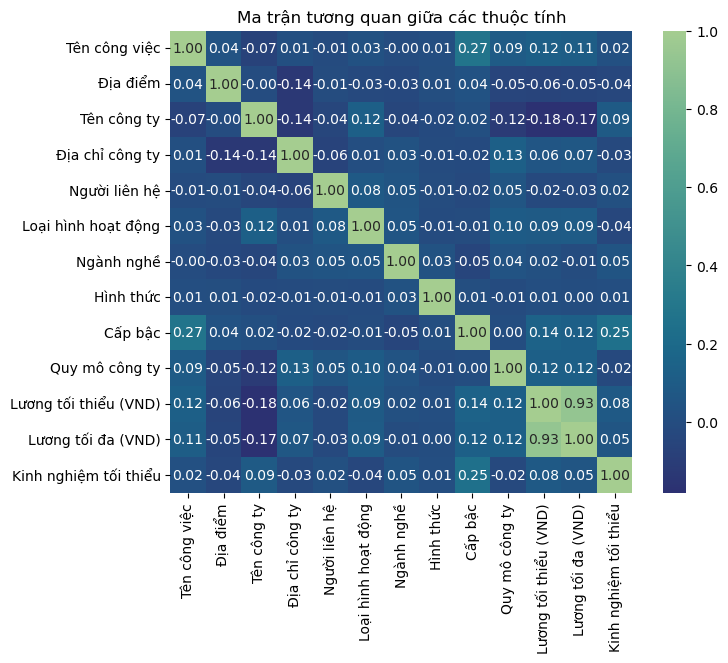

In [59]:
label_encoder = LabelEncoder()

copy_df = cleaned_df.copy()
for column in cleaned_df.select_dtypes(include=['object']).columns:
    copy_df[column] = label_encoder.fit_transform(copy_df[column])

correlation_matrix = copy_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='crest_r', square=True)
plt.title('Ma trận tương quan giữa các thuộc tính')
plt.show()